In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [33]:
music_data_df = pd.read_csv('../Music-Research-Project-1/Resources/tracks_2011to2020.csv')
music_data_df.head(20)

,Track,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Duration,year
0,Man on a Mission,0.787,0.903,-4.894,0.03,0.29,0.00,0.10,0.962,120.0,224307,2018
1,Do It for Love,0.587,0.958,-5.149,0.06,0.11,0.00,0.06,0.832,88.0,238000,2018
2,Someday We'll Know,0.565,0.781,-5.073,0.03,0.02,0.00,0.08,0.461,110.0,268013,2018
3,Forever for You,0.651,0.567,-6.417,0.02,0.56,0.00,0.19,0.370,97.0,277813,2018
4,Life's Too Short,0.833,0.805,-4.554,0.03,0.08,0.01,0.07,0.974,116.0,209960,2018
5,Getaway Car,0.782,0.619,-5.759,0.03,0.26,0.00,0.06,0.898,110.0,229253,2018
6,Make You Stay,0.605,0.921,-4.336,0.04,0.02,0.00,0.23,0.705,90.0,221174,2018
7,Miss DJ,0.679,0.891,-3.531,0.03,0.10,0.00,0.16,0.965,103.0,229213,2018
8,She Got Me Bad,0.610,0.744,-5.819,0.05,0.41,0.00,0.14,0.672,170.0,196280,2018
9,Breath of Your Life,0.705,0.769,-7.083,0.03,0.28,0.00,0.10,0.795,96.0,234987,2018


In [34]:
music_data_df["liveness"] = (music_data_df["liveness"]*100)
music_data_df["danceability"] = (music_data_df["danceability"]*100)
music_data_df["energy"] = (music_data_df["energy"]*100)
music_data_df["speechiness"] = (music_data_df["speechiness"]*100)
music_data_df["acousticness"] = (music_data_df["acousticness"]*100)
music_data_df["instrumentalness"] = (music_data_df["instrumentalness"]*100)
music_data_df["valence"] = (music_data_df["valence"]*100)
music_data_df["Duration"] = (music_data_df["Duration"]/60000)
music_data_df["year"]=music_data_df["year"].astype(int)
music_data_df = music_data_df.sort_values("year",ascending=True)
music_data_df = music_data_df.rename(columns={'year':'Year',
                                            'danceability':'Danceability',
                                            'energy':'Energy',
                                            'loudness':'Loudness',
                                            'speechiness':'Speechiness',
                                            'acousticness':'Acousticness',
                                            'instrumentalness':'Instrumentalness',
                                            'liveness':'Liveness',
                                            'valence':'Valence',
                                            'tempo':'Tempo'})
music_data_df.head(20)

,Track,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Year
140935,Hello Lou,25.5,25.700,-12.793,3.0,87.0,30.0,12.0,23.10,134.0,3.714217,2011
30674,In The Last Five Seconds,53.8,48.400,-11.485,8.0,34.0,59.0,34.0,55.50,97.0,4.999333,2011
30675,Free Fall Resume,48.8,26.600,-19.037,18.0,65.0,75.0,17.0,48.40,84.0,1.678217,2011
30676,Covers,54.6,77.600,-9.081,3.0,40.0,0.0,12.0,58.80,176.0,5.087783,2011
30677,Lyric,61.1,66.000,-9.103,3.0,47.0,13.0,7.0,67.60,140.0,5.559550,2011
30678,The Moonlight Butterfly,54.9,69.500,-14.512,3.0,52.0,82.0,7.0,96.30,131.0,4.086883,2011
30679,Up on the North Shore,63.1,86.500,-5.967,4.0,13.0,0.0,28.0,83.80,144.0,3.985333,2011
30680,Inn Keeping,69.6,45.500,-12.359,3.0,67.0,35.0,8.0,48.60,140.0,10.401117,2011
30681,Monday,75.4,46.900,-10.345,3.0,57.0,2.0,11.0,60.90,96.0,4.269117,2011
30673,Free Fall White,16.8,0.205,-39.388,4.0,95.0,22.0,9.0,9.26,82.0,1.173333,2011


Text(0.5, 1.0, 'Number of Tracks per Year')

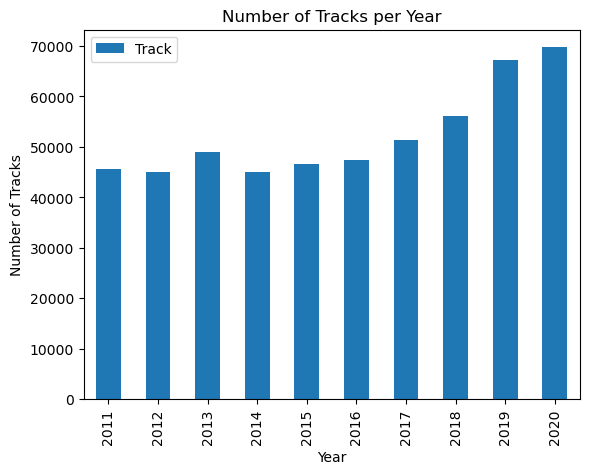

In [35]:
music_count_byyear = music_data_df.groupby("Year").count().reset_index()
music_count_byyear
bar = music_count_byyear.plot(kind="bar",x="Year",y="Track")
bar
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Year')

Text(0.5, 1.0, 'Average Energy of Songs By Year')

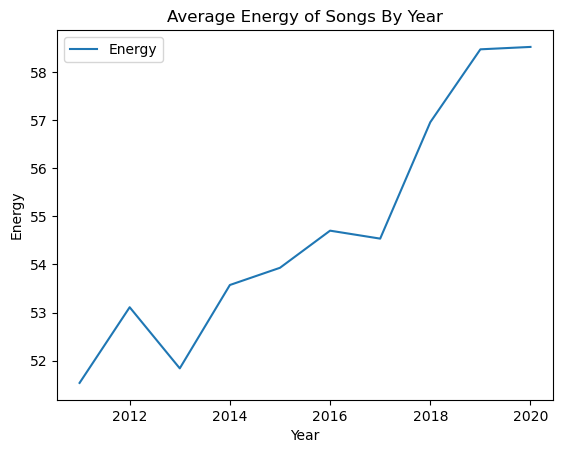

In [36]:
music_mean_byyear = music_data_df.groupby("Year").mean().reset_index()
music_mean_byyear
line1 = music_mean_byyear.plot(kind="line",x="Year",y="Energy")
line1
plt.ylabel('Energy')
plt.title('Average Energy of Songs By Year')

Text(0.5, 1.0, 'Average Tempo of Songs By Year')

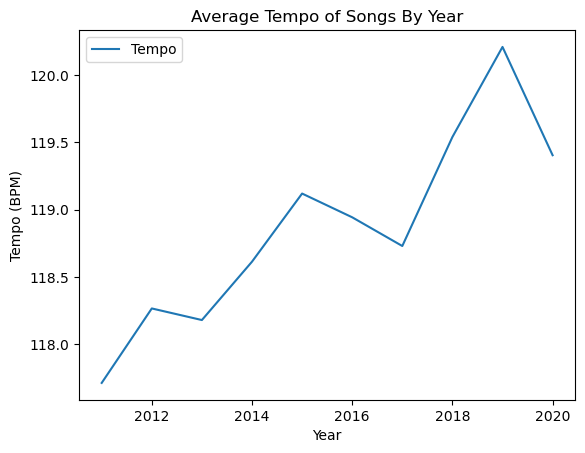

In [37]:
line2 = music_mean_byyear.plot(kind="line",x="Year",y="Tempo")
line2
plt.ylabel('Tempo (BPM)')
plt.title('Average Tempo of Songs By Year')

Text(0.5, 1.0, 'Average Danceability of Songs By Year')

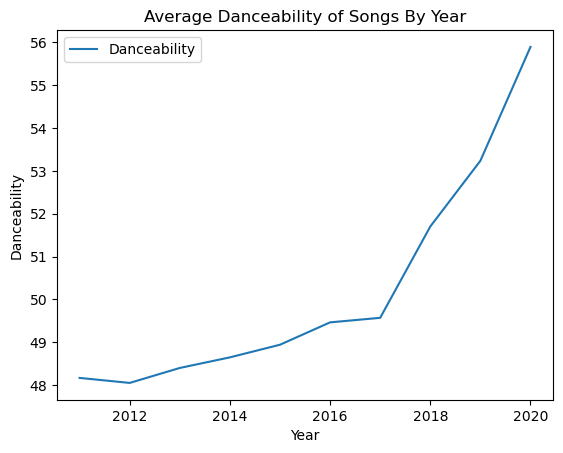

In [38]:
line3 = music_mean_byyear.plot(kind="line",x="Year",y="Danceability")
line3
plt.ylabel('Danceability')
plt.title('Average Danceability of Songs By Year')

rvalue: -0.8074257859500592
slope: -0.05363508875864409
intercept: 112.26863127328545
2023 average song duration : 3.7648467145484545


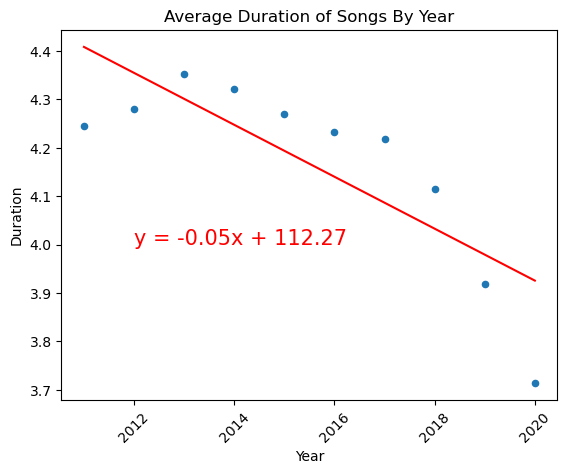

In [39]:
line4 = music_mean_byyear.plot(kind="scatter",x="Year",y="Duration")
line4

# fig, ax = plt.subplots()
# mice_scatter_plot2 = plt.scatter(mice_scatter_average["Weight (g)"],mice_scatter_average["Tumor Volume (mm3)"])
# ax.set_ylabel('Tumor Volume (mm3)')
# ax.set_xlabel('Weight (g)')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(music_mean_byyear["Year"], music_mean_byyear["Duration"])
regress_values = music_mean_byyear["Year"] * slope + intercept
plt.plot(music_mean_byyear["Year"],regress_values,"r-")
plt.xticks(rotation = 45)
plt.title('Average Duration of Songs By Year')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2012,4),fontsize=15,color="red")
print(f"rvalue: {rvalue}")
print(f"slope: {slope}")
print(f"intercept: {intercept}")
y=slope*2023+intercept
print(f"2023 average song duration : {y}")
plt.show()